# Regression Modeling on Ames Data Set

## Objective:
- Build a model that will predict the housing prices in Ames, Iowa.

## Libraries and Datasets

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
train = pd.read_csv('./datasets/train_clean.csv')

In [3]:
test = pd.read_csv('./datasets/test_clean.csv')

In [4]:
train.drop('Unnamed: 0', axis=1, inplace=True) #dropping unnamed column

In [5]:
test.drop('Unnamed: 0', axis=1, inplace=True) #dropping unnamed column

## Finding A Baseline

In [6]:
#finding a baseline score by creating a column of the mean of the saleprice in datasets
train['mean'] = train["saleprice"].mean()

#finding the RMSE baseline by using the mse method that subtracts the saleprice column from the mean column, 
 #squaring it, then getting the sqaure root with numpy
np.sqrt(mean_squared_error(train['saleprice'], train['mean']))

79239.33504161824

The baseline rmse score that I will be comparing my model to is roughly $79,239.







## Multiple Linear Regression

In [7]:
#setting feature variables
X = train[['lot_frontage', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'exter_qual', 'exter_cond', 
        'bsmt_qual', 'year_remod/add','bsmt_cond', 'heating_qc', 'central_air', 
        'electrical', 'totrms_abvgrd', 'kitchen_qual', 'functional', 'fireplaces', 'fireplace_qu', 
        'garage_qual', 'garage_area', 'garage_cars', 'pool_area', 'misc_val', 'total_baths', 'total_bsmt_sf', 
        '1st_flr_sf', '2nd_flr_sf']]

#setting target variable
y = train['saleprice']

In [8]:
#Instatiat model
lr = LinearRegression() 

#train, test, split variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit model to training data
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
#train score
lr.score(X_train, y_train)

0.8309613241675486

In [10]:
#test score
lr.score(X_test, y_test)

0.8619024706796021

Based on these scores we can see that the model is slightly underfit since the testing score is .03 higher than the training score.

In [11]:
#get predictions on testing data
y_preds = lr.predict(X_test)

In [12]:
#calculate rmse score
rmse = np.sqrt(mean_squared_error(y_preds, y_test))
rmse

28644.52146784223

The predictions are roughly $28,644 squared off from the actual values.

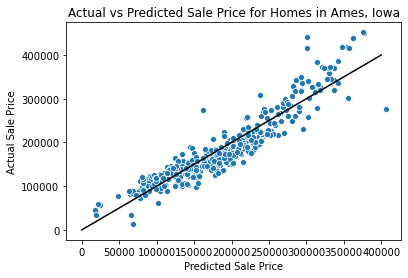

In [13]:
#checking linearity of this model
sns.scatterplot(y_preds, y_test)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Actual vs Predicted Sale Price for Homes in Ames, Iowa")
plt.plot([0, 400_000],
        [0, 400_000],
        c = "black");

## Lasso Regression Model

In [14]:
#instantiate model
lasso = Lasso()

#fit model with same variables as linear regression
lasso.fit(X_train, y_train)

Lasso()

In [15]:
#train score
lasso.score(X_train, y_train)

0.8309613086048078

In [16]:
#test score
lasso.score(X_test, y_test)

0.8619207285925826

This model performed almost exactly like the linear regression model and is slightly underfit. I played around with alpha values and the higher the alphas got, the further apart and lower my scores got. 

In [17]:
#get predictions
lasso_preds = lasso.predict(X_test)

In [18]:
#calculate rmse score
rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
rmse

28642.6278551535

The predictions are roughly $28,642 squared off from the actual values.

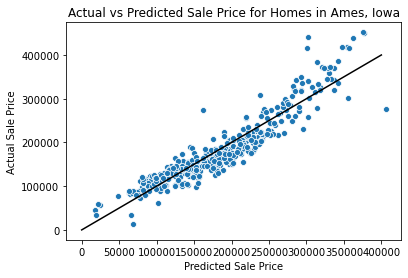

In [19]:
#checking linearity in this model
sns.scatterplot(lasso_preds, y_test)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Actual vs Predicted Sale Price for Homes in Ames, Iowa")
plt.plot([0, 400_000],
        [0, 400_000],
        c = "black");

## Ridge 

In [20]:
#instantiate model
ridge = Ridge(alpha=100)

#fit model with same variables from linear regression
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [21]:
#train score
ridge.score(X_train, y_train)

0.8295752663478837

In [22]:
#test score
ridge.score(X_test, y_test)

0.8651952101491152

This model is still slightly underfit and performed best with the alphas set to 100.

In [23]:
#get predictions
ridge_preds = ridge.predict(X_test)

In [24]:
#calculate rmse score
rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
rmse

28300.96725460634

The predictions are roughly $28,301 squared off from the actual values.

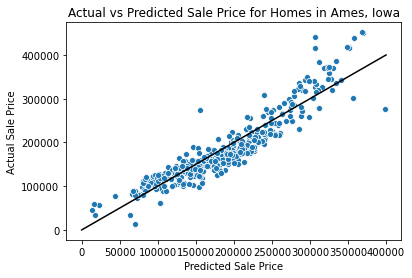

In [25]:
#checking linearity of this model
sns.scatterplot(ridge_preds, y_test)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Actual vs Predicted Sale Price for Homes in Ames, Iowa")
plt.plot([0, 400_000],
        [0, 400_000],
        c = "black");

## Feature engineering to find an even better model

### Checking multicolinearity between outdoor features and saleprice

In [26]:
#creating list of all variables that would be considered outside features
outdoors = train[['street', 'alley', 'fence', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
                  'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc',
                  'saleprice']]

#adding these features to their own dataframe
outdoors = pd.DataFrame(outdoors)

In [27]:
outdoors.head()

,street,alley,fence,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,saleprice
0,0,0,0,2,0,44,0,0,0,0,0,130500
1,0,0,0,2,0,74,0,0,0,0,0,220000
2,0,0,0,2,0,52,0,0,0,0,0,109000
3,0,0,0,2,100,0,0,0,0,0,0,174000
4,0,0,0,0,0,59,0,0,0,0,0,138500


In [28]:
#uncomment this code to check correlation with a heatmap
#plt.figure(figsize=(10,6))

#sns.heatmap(outdoors.corr(), annot=True);

It doesn't appear that any extra outdoor feature apart from garages have a significant impact on the price of a home so I probably won't be using many of these in my next model.

### Multicolinearity between garage features and sale price

In [29]:
#creating a list of all garage features
garage_feats = train[['garage_type', 'garage_yr_blt','garage_finish', 'garage_cars', 'garage_area', 
                  'garage_qual','garage_cond', 'saleprice']]

#creating dataframe for garage features
garage_feats = pd.DataFrame(garage_feats)

In [30]:
garage_feats.head()

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,saleprice
0,Attchd,1976.0,2,2.0,475.0,3,3,130500
1,Attchd,1997.0,2,2.0,559.0,3,3,220000
2,Detchd,1953.0,1,1.0,246.0,3,3,109000
3,BuiltIn,2007.0,3,2.0,400.0,3,3,174000
4,Detchd,1957.0,1,2.0,484.0,3,3,138500


In [31]:
#dummying up garage types because I didn't in the cleaning process and want to see if there is any correlation here
garage_feats = pd.concat([garage_feats, pd.get_dummies(garage_feats[['garage_type']])], axis=1)

In [32]:
#uncomment this code to check correlation with a heatmap
#plt.figure(figsize=(10,6))

#sns.heatmap(garage_feats.corr(), annot=True);

Based on this correlation map, it appears that attached and builtin garages are the only types that have an impact on saleprice so in my feature engineering I will be addressing this.

### Checking multicolinearity between quality and condition of a house and sale price

In [33]:
#creating a list of quality and condition
qual_cond = train[['overall_qual', 'overall_cond', 'exter_qual', 'exter_cond', 'kitchen_qual', 
                   'garage_qual', 'garage_cond', 'saleprice', 'bsmt_qual', 'bsmt_cond']]

#creating dataframe for quality/condition
qual_cond = pd.DataFrame(qual_cond)
qual_cond.head()

,overall_qual,overall_cond,exter_qual,exter_cond,kitchen_qual,garage_qual,garage_cond,saleprice,bsmt_qual,bsmt_cond
0,6,8,4,3,4,3,3,130500,3,3
1,7,5,4,3,4,3,3,220000,4,3
2,5,7,3,4,4,3,3,109000,3,3
3,5,5,3,3,3,3,3,174000,4,3
4,6,8,3,3,3,3,3,138500,2,4


In [34]:
#uncomment this code to check correlation with a heatmap
#plt.figure(figsize=(10,6))

#sns.heatmap(qual_cond.corr(), annot=True);

Here we can see that kitchen quality, exteriort quality, basement quality, and overall quality have a huge impact on the price of a house so these will be important features to mess around with in the next model.

### Multicolinearity between ammenities and pricing

In [35]:
#creating list of ammenities and such
ammenities = train[['utilities', 'heating', 'heating_qc', 'central_air', 'electrical', 
                    'fireplaces', 'fireplace_qu','saleprice']]

#creating dataframe for ammenities and such
ammenities = pd.DataFrame(ammenities)
ammenities.head()

,utilities,heating,heating_qc,central_air,electrical,fireplaces,fireplace_qu,saleprice
0,4,GasA,5,0,0,0,0,130500
1,4,GasA,5,0,0,1,3,220000
2,4,GasA,3,0,0,0,0,109000
3,4,GasA,4,0,0,0,0,174000
4,4,GasA,3,0,0,0,0,138500


In [36]:
#uncomment this code to check correlation with a heatmap
#plt.figure(figsize=(10,6))

#sns.heatmap(ammenities.corr(),annot=True);

### Multicolinearity between beds/baths/sqft and price

In [37]:
#creating list for inside of house
inside = train[['total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'totrms_abvgrd',
                'gr_liv_area', 'bedroom_abvgr', 'kitchen_abvgr', 'total_baths', 'saleprice']]

#creating dataframe for inside house
inside = pd.DataFrame(inside)
inside.head()

,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,totrms_abvgrd,gr_liv_area,bedroom_abvgr,kitchen_abvgr,total_baths,saleprice
0,725.0,725,754,0,6,1479,3,1,2.5,130500
1,913.0,913,1209,0,8,2122,4,1,3.5,220000
2,1057.0,1057,0,0,5,1057,3,1,2.0,109000
3,384.0,744,700,0,7,1444,3,1,2.5,174000
4,676.0,831,614,0,6,1445,3,1,2.0,138500


In [38]:
#uncomment this code to check correlation with a heatmap
#plt.figure(figsize=(10,6))

#sns.heatmap(inside.corr(), annot=True);

From here I can see that total basement sqft, 1st floor sqft, above ground area, and total amount of bathrooms and bedrooms play the biggest role in salesprice. I think I am going to make some interaction variables based off of this graph to see if my model can perform even better.

### Multicolinearity bewtween neighborhoods and price

In [39]:
#list comp to pull all neighborhoods from training data frame
train_neigh = [col for col in train.columns if 'neighborhood_' in col] 
#list comp to pull all neighborhoods from testing data frame
test_neigh = [col for col in test.columns if 'neighborhood_' in col]

In [40]:
#checking to see if there are neighborhoods missing from in either dataframe to exclude in the next model
no_neighbors = [] #first start with an empty list

for col in train_neigh: #iterate through each column in the train data that has neighborhood in it
    if col in test_neigh: #checking to see if column is in test data
        pass #if so, ignore
    else:
        no_neighbors.append(col) #if column not in testing data, adding it to the empty list 
        
print(no_neighbors)

[]


In [43]:
#uncomment this code to drop neighborhood columns that aren't in both datasets
#train.drop('neighborhood_GrnHill', axis=1, inplace=True)
#train.drop('neighborhood_Landmrk', axis=1, inplace=True)

In [44]:
#creating list of all the neighborhoods
neighborhoods = train[['neighborhood_Blmngtn', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
 'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert',
 'neighborhood_Greens', 'neighborhood_IDOTRR', 'neighborhood_MeadowV','neighborhood_Mitchel', 'neighborhood_NAmes', 
 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
 'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr',
 'neighborhood_Timber', 'neighborhood_Veenker', 'saleprice']]

#creating dataframe for neighborhoods
neighborhoods = pd.DataFrame(neighborhoods)
neighborhoods.head()

,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,...,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,saleprice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,130500
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,220000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,174000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,138500


In [45]:
#uncomment this code to check correlation with a heatmap
#plt.figure(figsize=(16,12))

#sns.heatmap(neighborhoods.corr(), annot=True);

The only neighborhoods that really seem to impact price are North Ridge and Northridge Heights. 

#### Feature variables based off of multicolinearity findings

In [46]:
#variable for total square footage in the house
train['total_sf'] = train['total_bsmt_sf'] + train['1st_flr_sf'] + train['2nd_flr_sf']

In [47]:
#interaction variable for total sqft and the overall quality of a house
train['total_sf*total_qual'] = train['overall_qual'] * train['total_sf']

In [48]:
#interaction variable for fireplace and their quality
train['fireplace*fireplace_qu'] = train['fireplaces'] * train['fireplace_qu']

In [49]:
#interaction variable for bedrooms and bathrooms in the house
train['beds*baths'] = train['bedroom_abvgr'] * train['total_baths']

In [50]:
#adding dummy garage types to train data frame
train = pd.concat([train, pd.get_dummies(train[['garage_type']])], axis=1)

In [51]:
#variable for total square footage in the house
test['total_sf'] = test['total_bsmt_sf'] + test['1st_flr_sf'] + test['2nd_flr_sf'] 

In [52]:
#interaction variable for total sqft and the overall quality of a house
test['total_sf*total_qual'] = test['overall_qual'] * test['total_sf']

In [53]:
#interaction variable for fireplace and their quality
test['fireplace*fireplace_qu'] = test['fireplaces'] * test['fireplace_qu']

In [54]:
#interaction variable for bedrooms and bathrooms in the house
test['beds*baths'] = test['bedroom_abvgr'] * test['total_baths']

In [55]:
#adding dummy garage types to test data frame
test = pd.concat([test, pd.get_dummies(test[['garage_type']])], axis=1)

In [56]:
train.to_csv('./datasets/train_clean.csv') #saving new changes

In [57]:
test.to_csv('./datasets/test_clean.csv') #saving new changes

## Modeling With Feature Engineering

### Linear Regression

In [58]:
#set up independent variables
X_3 = train[['overall_qual', 'total_sf', 'total_sf*total_qual', 'total_baths', 'lot_frontage', 
             'lot_area','heating_qc', 'central_air', 'totrms_abvgrd', 'garage_area', 'garage_cars', 
             'garage_finish','gr_liv_area', 'utilities', 'fireplace*fireplace_qu', 'electrical',
             'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_StoneBr','exter_qual', 
             'kitchen_qual', 'garage_qual', 'bsmt_qual', 'garage_type_Attchd',
             'garage_type_BuiltIn']]

#set up target variable
y_3 = train['saleprice']

In [59]:
#instantiate model
lm = LinearRegression()

#train, test, split data
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

#fit model to training data
lm.fit(X_train_3, y_train_3)

LinearRegression()

In [60]:
#score train data
lm.score(X_train_3, y_train_3)

0.8384770997318182

In [61]:
#score test data
lm.score(X_test_3, y_test_3)

0.8717933454831784

This model is also slightly underfit even after adding interaction variables but still a decent model.

In [62]:
#get predictions
preds_3 = lm.predict(X_test_3)

In [63]:
#calculate rmse score
rmse = np.sqrt(mean_squared_error(preds_3, y_test_3))
rmse

27599.670726810178

The predictions are roughly $27,600 squared off from the actual values. This was my best model and is an improvement of roughly $51,640 from the $79,239 baseline rmse.

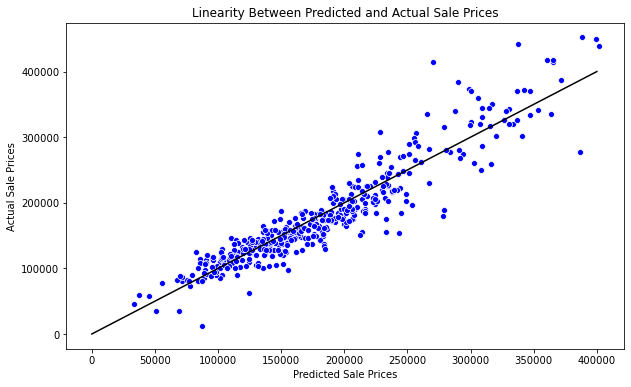

In [64]:
#checking linearity with a scatterplot
plt.figure(figsize=(10,6))

sns.scatterplot(preds_3, y_test_3, color='blue');

plt.xlabel("Predicted Sale Prices")
plt.ylabel("Actual Sale Prices")
plt.title("Linearity Between Predicted and Actual Sale Prices")

plt.plot([0, 400_000], [0, 400_000], c = 'k') #<-- creating the black line at 0

plt.show()

This model is very linear between the predicted and actual prices. Because of this, we know the model is overall a good model for this dataset. This model is showing pretty good bias with a little bit of high variance towards the right end of the graph and towards the left end of the graph. 

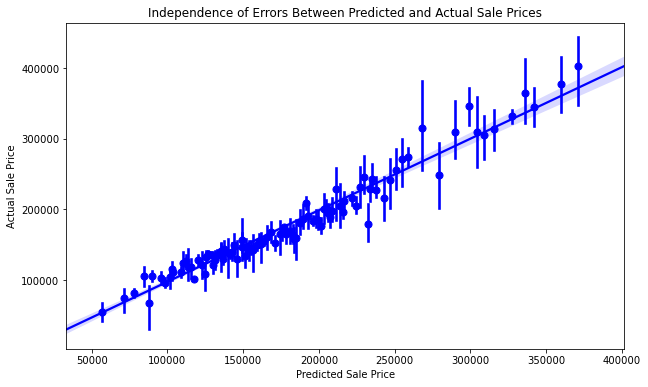

In [65]:
#checking independence of errors
fig = plt.figure(figsize=(10,6))

ax = fig.gca()

sns.regplot(x=preds_3, y=y_test_3, x_bins=100, color='blue') 

plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Independence of Errors Between Predicted and Actual Sale Prices");

This plot is showing the independence of errors and that overall, our model is pretty low biased and slightly high varianced.

-1400.3087216892282


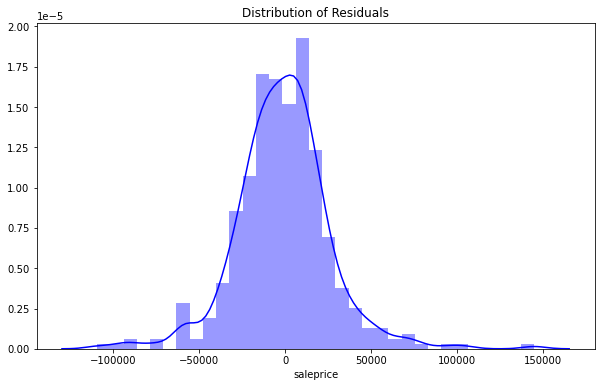

In [66]:
#checking normality of errors -- distribution of residuals
fig = plt.figure(figsize=(10,6))

residuals = y_test_3 - preds_3 #calculate residuals by subtracting y predicitons from y values 

plt.title("Distribution of Residuals");

print(residuals.mean())
sns.distplot(residuals, color='blue');

The residuals are pretty normally distributed with a nice bell curve and most are close to zero which is what we want in a good model. 

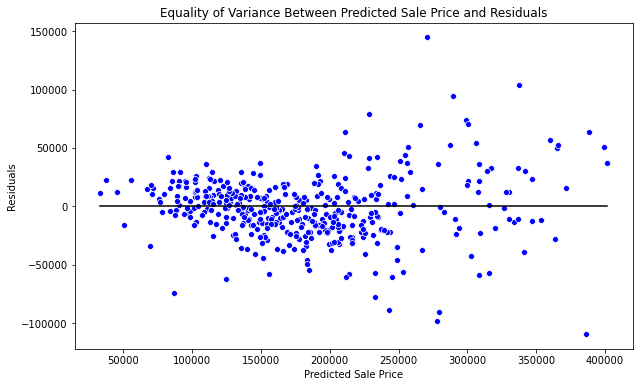

In [67]:
#equality of variance
fig = plt.figure(figsize=(10,6))
ax = plt.gca()

sns.scatterplot(x=preds_3, y=residuals, color='blue');
ax.plot((preds_3.min(), preds_3.max()), (0,0), color='k');

plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Equality of Variance Between Predicted Sale Price and Residuals");

The variance between the residuals and predicted values starts at low on the left and in the middle of the graph but starts to get high on the right side of the graph. Next steps would be going back and looking for any outliers that I may have missed when cleaning up the data.

In [68]:
lm.coef_

array([ 7.41400865e+03, -1.57572529e+00,  1.80106803e+00,  1.06333753e+04,
        2.79550275e+01,  1.09634800e+00,  2.82368607e+03, -6.82609814e+03,
        2.40570446e+03,  2.85250228e+01,  3.03676194e+03,  1.92312922e+03,
        8.75263248e+00, -2.84671842e-09,  3.21495133e+03,  4.29509269e+02,
        3.93660206e+04,  4.28577300e+04,  6.07034365e+04,  1.10463550e+04,
        1.13993475e+04, -2.02959820e+03,  5.24111403e+03,  2.00473665e+03,
        2.00473665e+03,  1.07818716e+03,  1.07818716e+03])

In [69]:
lm.intercept_

-91787.43757775033

In [70]:
list(zip(X_train_3, lm.coef_))

[('overall_qual', 7414.008649334414),
 ('total_sf', -1.57572529109958),
 ('total_sf*total_qual', 1.8010680325496484),
 ('total_baths', 10633.375250561645),
 ('lot_frontage', 27.955027464993844),
 ('lot_area', 1.0963479989916172),
 ('heating_qc', 2823.6860706404527),
 ('central_air', -6826.098135155191),
 ('totrms_abvgrd', 2405.704461142547),
 ('garage_area', 28.52502277610698),
 ('garage_cars', 3036.7619440164563),
 ('garage_finish', 1923.1292216605389),
 ('gr_liv_area', 8.752632483598774),
 ('utilities', -2.8467184165492654e-09),
 ('fireplace*fireplace_qu', 3214.951329623501),
 ('electrical', 429.5092693132255),
 ('neighborhood_NoRidge', 39366.02058107266),
 ('neighborhood_NridgHt', 42857.73003059026),
 ('neighborhood_StoneBr', 60703.43651818403),
 ('exter_qual', 11046.354967002435),
 ('kitchen_qual', 11399.347464358181),
 ('garage_qual', -2029.5982036009348),
 ('bsmt_qual', 5241.1140288896795),
 ('garage_type_Attchd', 2004.7366469742442),
 ('garage_type_Attchd', 2004.7366469748495),


Here I am looking at how each variable impacts saleprice when all else is held constant. For example, when all else held constant, the overall quality of the house impacts the price y $7,414.